# Benchmark

In [1]:
!pip install multiprocess requests numpy

In [2]:
# importo la libreria che ho scritto per effetture i benchmark
from libreria.utils import visualizza_grafico_combinato, tempo_di_esecuzione, info_file
from libreria.utils import visualizza_grafico, esegui_thread_processi, format_bytes

### I/O bound - socket

In [3]:
import requests


@tempo_di_esecuzione  # decoratore che permette di salvare il tempo di esecuzione della funzione
def download(url):
    try:
        resp = requests.get(url)  # richiesta e download dei dati della risorsa esterna
    except requests.exceptions.RequestException as errore:
        print('Errore HTTP: ', errore)

In [4]:
def io_bound_socket():
    # url = 'https://freetestdata.com/wp-content/uploads/2021/09/Free_Test_Data_1MB_PDF.pdf'  # 1 MB
    # url = 'https://freetestdata.com/wp-content/uploads/2021/09/500kb.png'  # 500 KB
    url = 'https://freetestdata.com/wp-content/uploads/2021/09/Free_Test_Data_100KB_PDF.pdf'  # 100 KB
    info_file(url)

    num_urls = 16  # numero di url da scaricare
    urls = [url for i in range(num_urls)]  # creo una lista di url da scaricare
    esegui_thread_processi(download, urls, grafico_combinato=True, lista_thread_processi=[1, 2, 4, 8])

In [5]:
if __name__ == '__main__':
    io_bound_socket()

<Response [200]>
Le dimensioni del file sono:  100.20KB
Eseguito in 0.4049 secondi


Process SpawnProcess-1:
Traceback (most recent call last):
  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/concurrent/futures/process.py", line 237, in _process_worker
    call_item = call_queue.get(block=True)
  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'download' on <module '__main__' (built-in)>


BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

### I/O bound - scrittura su file

In [ ]:
@tempo_di_esecuzione
def scrittura_su_file(testo):
    try:
        with open('reports/test.txt', 'wt', encoding='utf-8') as f:  # apro il file in scrittura
            f.write(testo)
    except IOError as errore:
        print('Errore I/O: ', errore)

In [7]:
import random, string


def io_bound_pesante():
    num_test = 16  # numero di test da eseguire
    testo = ''.join(random.choice(string.ascii_lowercase) for i in range(10 ** 7 * 2))
    print("Dimensioni del testo: ", format_bytes(len(testo)))
    test = [testo for i in range(num_test)]  # creo una lista di test da eseguire
    esegui_thread_processi(scrittura_su_file, test)

Dimensioni del testo:  19.07MB
file saved reports/1_thread.png


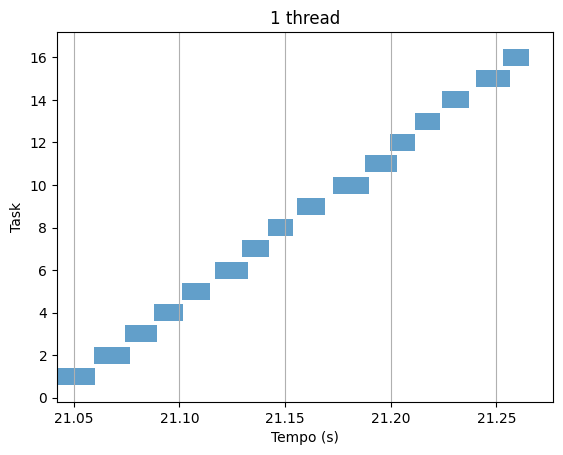

Process SpawnProcess-2:
Traceback (most recent call last):
  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/concurrent/futures/process.py", line 237, in _process_worker
    call_item = call_queue.get(block=True)
  File "/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'scrittura_su_file' on <module '__main__' (built-in)>


BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [8]:
if __name__ == '__main__':
    io_bound_pesante()

### CPU bound - calcolo pesante

In [9]:
@tempo_di_esecuzione
def aggiungi_a_lista(num):
    lista = []
    for n in range(num):
        lista.append(random.random())

In [10]:
def cpu_bound_pesante():
    num_test = 16  # numero di test da eseguire
    test = [10 ** 8 for i in range(num_test)]  # creo una lista di test da eseguire
    esegui_thread_processi(aggiungi_a_lista, test, grafico_combinato=True, lista_thread_processi=[1, 2, 4, 8])

In [11]:
if __name__ == '__main__':
    cpu_bound_pesante()

KeyboardInterrupt: 

### CPU bound - funzioni Numpy

In [ ]:
@tempo_di_esecuzione
def addition(array):
    res = array[0] + array[1]

In [ ]:
import numpy as np


def gil_unbound():
    dimensione = 10000
    num_test = 20  # numero di test da eseguire
    dimensione_array = [dimensione for i in range(num_test)]
    a = np.random.rand(dimensione, dimensione)
    b = np.random.rand(dimensione, dimensione)
    test = [(a, b) for i in range(num_test)]  # creo una lista di test da eseguire
    esegui_thread_processi(addition, test, grafico_combinato=True, lista_thread_processi=[1, 2, 4, 8])

In [ ]:
if __name__ == '__main__':
    gil_unbound()